**Introduction**

---


In this project, we have to analyze a dataset focused on analyzing and understanding gender inequality issues. The repository contains code, data, and visualizations related to various aspects of gender inequality, such as wage gaps, political representation, access to education, and more. The goal of this repository is to provide insights and promote awareness about gender disparities, leveraging data analysis and visualization techniques. It serves as a valuable resource for researchers, policymakers, and anyone interested in addressing gender inequality through data-driven approaches.

The datasets used are the Gender Inequality Dataset which contains about 170 countries, and the Glassdoor Gender Pay gap dataset with 1000 columns.

In [1]:
from google.colab import files
uploaded=files.upload()

Saving Glassdoor Gender Pay Gap.csv to Glassdoor Gender Pay Gap.csv
Saving Gender_Inequality_Index.csv to Gender_Inequality_Index.csv


In [2]:
import pandas as pd

In [3]:
inequality_df = pd.read_csv('Gender_Inequality_Index.csv')
gender_paygap_df = pd.read_csv('Glassdoor Gender Pay Gap.csv')

In [4]:
inequality_df.head()

,Country,Human_development,GII,Rank,Maternal_mortality,Adolescent_birth_rate,Seats_parliament,F_secondary_educ,M_secondary_educ,F_Labour_force,M_Labour_force
0,Switzerland,Very high,0.018,3.0,5.0,2.2,39.8,96.9,97.5,61.7,72.7
1,Norway,Very high,0.016,2.0,2.0,2.3,45.0,99.1,99.3,60.3,72.0
2,Iceland,Very high,0.043,8.0,4.0,5.4,47.6,99.8,99.7,61.7,70.5
3,Hong Kong,Very high,NaN,NaN,NaN,1.6,NaN,77.1,83.4,53.5,65.8
4,Australia,Very high,0.073,19.0,6.0,8.1,37.9,94.6,94.4,61.1,70.5


In [5]:
# check the contents of the dataframe(rows & columns)
inequality_df.shape

(195, 11)

In [6]:
# check the descriptive statistics of the data
inequality_df.describe()

,GII,Rank,Maternal_mortality,Adolescent_birth_rate,Seats_parliament,F_secondary_educ,M_secondary_educ,F_Labour_force,M_Labour_force
count,170.000000,170.000000,184.000000,195.000000,193.000000,177.000000,177.000000,180.000000,180.000000
mean,0.344376,85.376471,160.027174,44.597949,24.701554,62.706780,67.068362,50.224444,69.863333
std,0.197105,49.210206,233.028867,38.422479,12.404319,29.528487,26.450033,15.905491,9.012734
min,0.013000,1.000000,2.000000,1.600000,0.000000,6.400000,13.000000,6.000000,43.900000
25%,0.177500,43.250000,12.750000,10.750000,16.500000,37.700000,44.800000,42.400000,65.050000
50%,0.363000,85.500000,53.000000,36.200000,23.600000,69.900000,71.200000,52.150000,69.350000
75%,0.505750,127.750000,188.250000,64.200000,33.600000,90.200000,92.500000,60.475000,75.525000
max,0.820000,170.000000,1150.000000,170.500000,55.700000,100.000000,100.000000,83.100000,95.500000


In [7]:
# dropping null values to avoid biases
inequality_df.dropna(inplace=True)

In [8]:
inequality_df.isnull().sum()

,0
Country,0
Human_development,0
GII,0
Rank,0
Maternal_mortality,0
Adolescent_birth_rate,0
Seats_parliament,0
F_secondary_educ,0
M_secondary_educ,0
F_Labour_force,0


In [9]:
# Renaming column
inequality_df.rename(columns={'GII':'Gender_Inequality_Index',
                              'F_secondary_educ':'Female_Sec_Education',
                              'M_secondary_educ':'Male_Sec_Education',
                              'F_Labour_force':'Female_Labour_force',
                              'M_Labour_force':'Male_Labour_force'}, inplace = True)

In [10]:
# drop unwanted columns
inequality_df.drop(inequality_df.columns[[3]], axis=1, inplace=True)

In [11]:
inequality_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 170 entries, 0 to 190
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  170 non-null    object 
 1   Human_development        170 non-null    object 
 2   Gender_Inequality_Index  170 non-null    float64
 3   Maternal_mortality       170 non-null    float64
 4   Adolescent_birth_rate    170 non-null    float64
 5   Seats_parliament         170 non-null    float64
 6   Female_Sec_Education     170 non-null    float64
 7   Male_Sec_Education       170 non-null    float64
 8   Female_Labour_force      170 non-null    float64
 9   Male_Labour_force        170 non-null    float64
dtypes: float64(8), object(2)
memory usage: 14.6+ KB


The first dataset is now clean, let's proceed to check the second dataset for untidiness!



In [12]:
# check the second dataset
gender_paygap_df.head()

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319


In [13]:
gender_paygap_df.isnull().sum()

,0
JobTitle,0
Gender,0
Age,0
PerfEval,0
Education,0
Dept,0
Seniority,0
BasePay,0
Bonus,0


In [14]:
gender_paygap_df.duplicated().sum()

0

**The pay gap data looks clean enough with only 9 columns that are all relevant to the analysis, therefore no further cleaning is required.**

#Exploratory Analysis and Visualization

---


This is a better way to understand the data by plotting relationships of numerical variables

*Let's begin by importingmatplotlib.pyplot and seaborn.*

In [15]:
# importing necessary packages
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

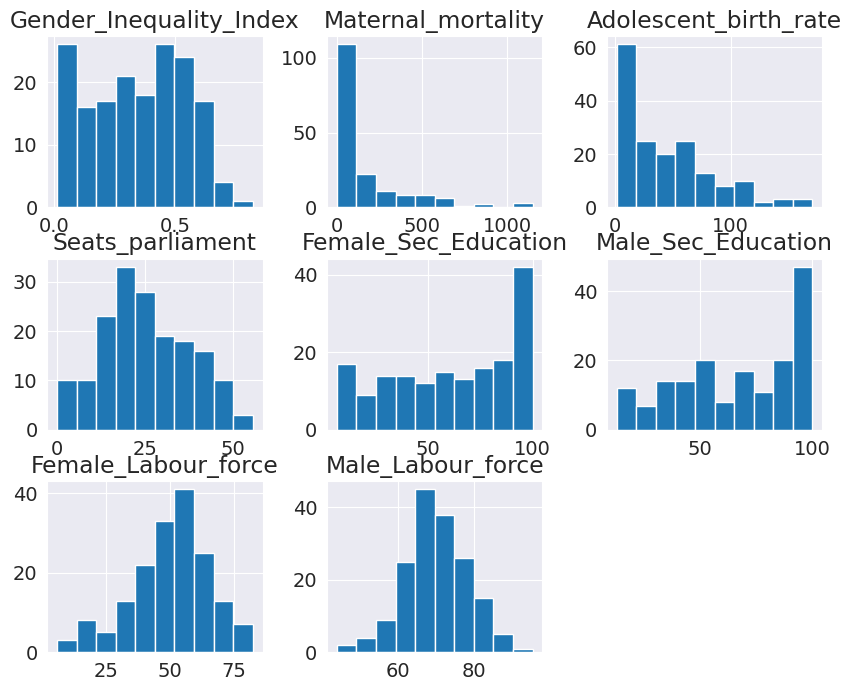

In [16]:
# let's look at the distribution of numeric columns
inequality_df.hist(figsize=(10, 8));

**Now let's display the mean of male and female workforce**

In [17]:
fLabour_mean = inequality_df.Female_Labour_force.mean()
print('The female labourforce mean is {}' .format(fLabour_mean))

The female labourforce mean is 50.352352941176456


In [18]:
mLabour_mean =inequality_df.Male_Labour_force.mean()
print('The male labourforce mean is {}' .format(mLabour_mean))

The male labourforce mean is 70.02411764705882


In [19]:
# checking count of countries by human development
human_dev = inequality_df.groupby("Human_development")["Gender_Inequality_Index"].count()
human_dev

,Gender_Inequality_Index
Human_development,
High,42
Low,30
Medium,36
Very high,62


There you have it! out of 170 countries in our dataset, only 100 countries have a high human development and when the human capacity is not developed how will citizens understand the importance of social issues affecting gender equality?

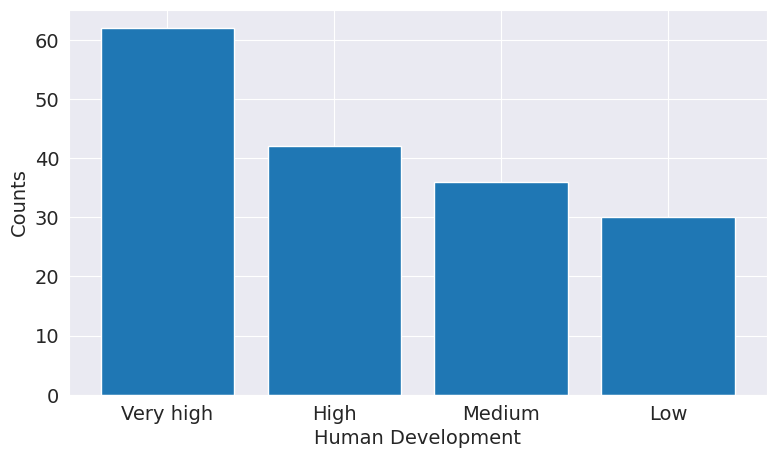

In [20]:
# plot human development for clearer view
x= inequality_df['Human_development'].unique()
y=inequality_df['Human_development'].value_counts()
plt.bar(x,y)
plt.xlabel('Human Development')
plt.ylabel('Counts');

Now let's look at the Gender Inequality Index

The GII varies between 0 (when women and men fare equally) and 1 (when men or women fare poorly compared to the other in all dimensions). It is designed to reveal the extent to which national human development achievements are eroded by gender inequality, and to provide empirical foundations for policy analysis and advocacy efforts.

**Now let's find out which countries rank the most and least respectively!**

In [21]:
# Let's see the distribution of numbers in this column
inequality_df.Gender_Inequality_Index.describe()

,Gender_Inequality_Index
count,170.000000
mean,0.344376
std,0.197105
min,0.013000
25%,0.177500
50%,0.363000
75%,0.505750
max,0.820000


The least GII here is 0.013000 and the highest is 0.820000


**Countries that rank top and bottom on the GII Index**

In [22]:
# Top 10 gender unequal countries
least_gender_equal_countries = inequality_df.sort_values('Gender_Inequality_Index', ascending=False).head(10)
least_gender_equal_countries

,Country,Human_development,Gender_Inequality_Index,Maternal_mortality,Adolescent_birth_rate,Seats_parliament,Female_Sec_Education,Male_Sec_Education,Female_Labour_force,Male_Labour_force
182,Yemen,Low,0.820,164.0,54.4,0.3,22.4,37.5,6.0,67.6
156,Papua New Guinea,Medium,0.725,145.0,55.3,0.0,10.8,15.5,46.3,48.1
163,Nigeria,Low,0.680,917.0,101.7,4.5,40.4,55.3,47.9,59.6
179,Afghanistan,Low,0.678,638.0,82.6,27.2,6.4,14.9,14.8,66.5
187,Central African Republic,Low,0.672,829.0,160.5,12.9,13.9,31.6,63.3,79.5
189,Chad,Low,0.652,1140.0,138.3,32.3,7.7,24.4,46.9,69.9
177,Liberia,Low,0.648,661.0,123.4,9.7,20.8,39.2,69.8,79.7
162,Haiti,Low,0.635,480.0,52.5,2.7,27.9,41.0,60.7,68.9
180,Sierra Leone,Low,0.633,1120.0,100.9,12.3,34.7,51.5,56.1,55.9
157,Mauritania,Medium,0.632,766.0,78.0,20.3,14.5,21.9,27.4,62.2


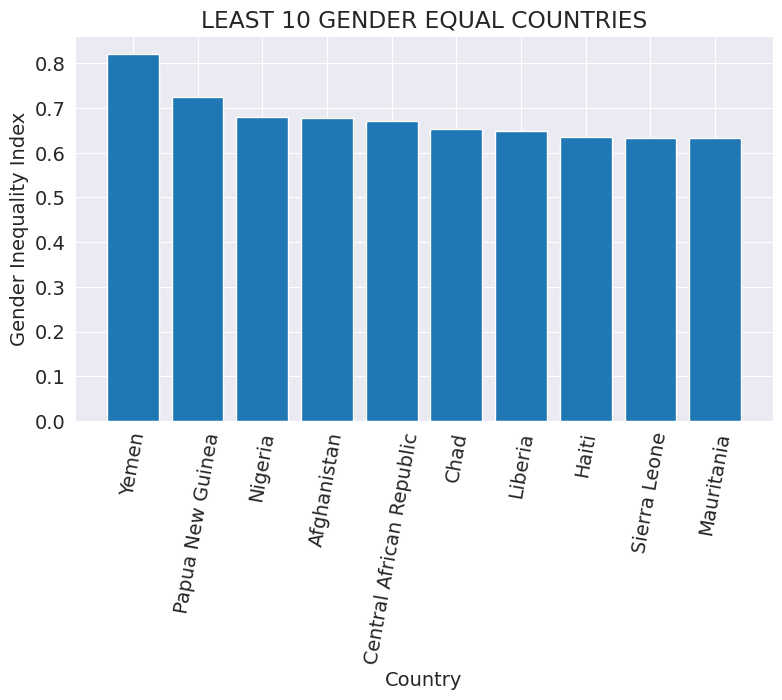

In [23]:
# plotting the top gender unequal countries using bar charts
x= least_gender_equal_countries.Country
y= least_gender_equal_countries.Gender_Inequality_Index
plt.bar(x,y)

plt.xlabel('Country')
plt.ylabel('Gender Inequality Index')
plt.xticks(rotation=80)
plt.title('LEAST 10 GENDER EQUAL COUNTRIES');

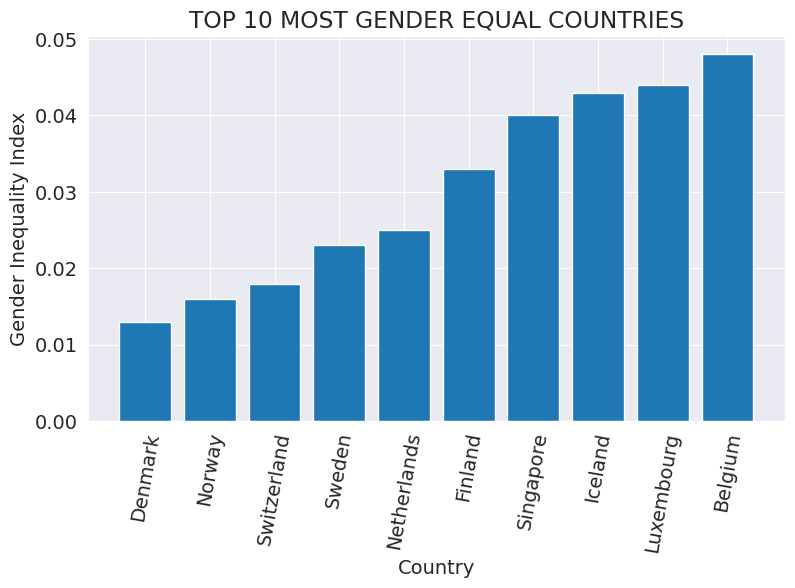

In [24]:
# Most gender equal countries
most_equal_countries = inequality_df.sort_values('Gender_Inequality_Index').head(10)
x= most_equal_countries.Country
y= most_equal_countries.Gender_Inequality_Index
plt.bar(x,y)

plt.xlabel('Country')
plt.ylabel('Gender Inequality Index')
plt.xticks(rotation=80)
plt.title('TOP 10 MOST GENDER EQUAL COUNTRIES');

**How female Education and labour force affect female parliamentary seats allocation**

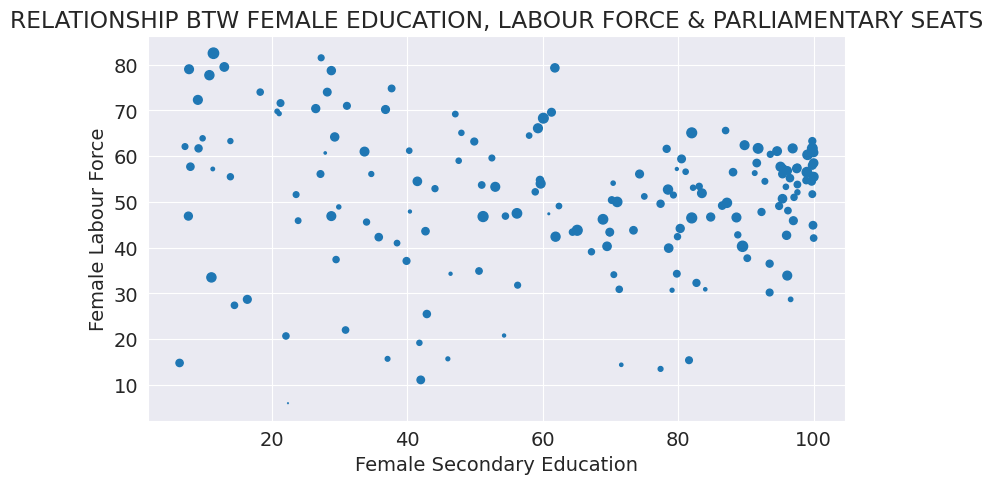

In [25]:
plt.scatter(data=inequality_df, x= 'Female_Sec_Education', y= 'Female_Labour_force', s='Seats_parliament')
plt.xlabel('Female Secondary Education')
plt.ylabel('Female Labour Force')
plt.title('RELATIONSHIP BTW FEMALE EDUCATION, LABOUR FORCE & PARLIAMENTARY SEATS');

**How female education affect adolescent birthrate and maternal mortality**

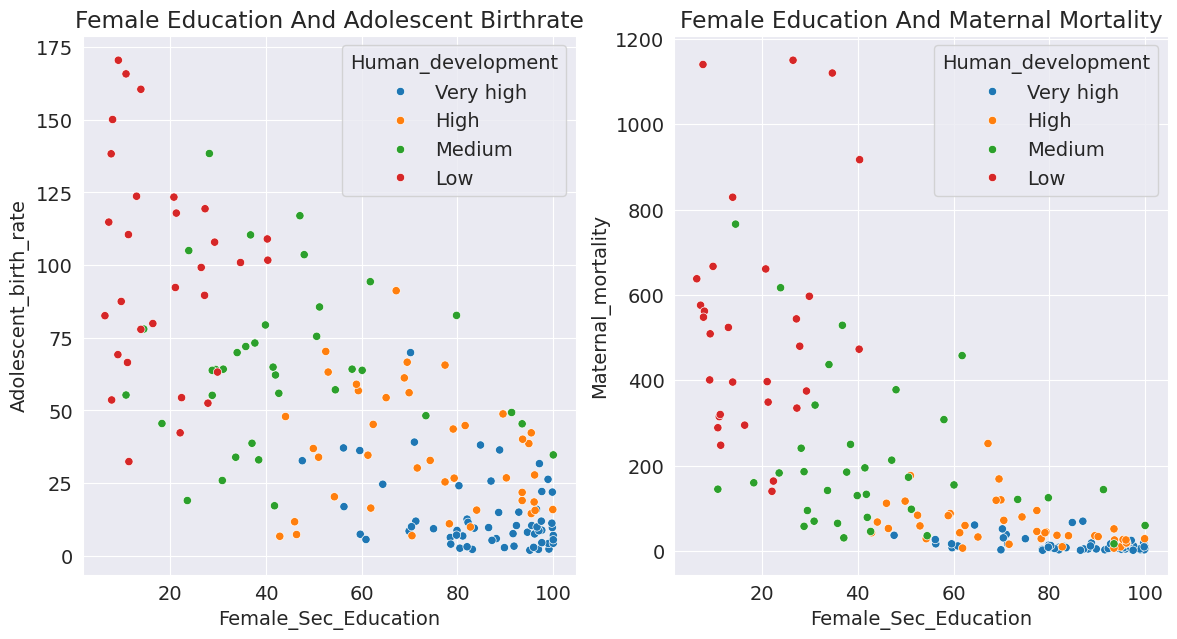

In [26]:
plt.figure(figsize=[14,7])

#plot on the left
plt.subplot(1,2,1)
sns.scatterplot(data= inequality_df, x = 'Female_Sec_Education', y ='Adolescent_birth_rate', hue= 'Human_development').set(title='Female Education And Adolescent Birthrate')

#plot on the right
plt.subplot(1,2,2)
sns.scatterplot(data= inequality_df, x = 'Female_Sec_Education', y ='Maternal_mortality', hue ='Human_development').set(title='Female Education And Maternal Mortality');

We can observe that there is a general trend of increasing female labor force participation as the level of female secondary education increases. Additionally, we can see that countries with more parliamentary seats held by women tend to have higher levels of female labor force participation.

**Asking and Answering Questions**

---

We are going to answer questions surrounding Gender inequality and the three dimensions that contribute to it(reproductive health, empowerment and the labour market).
We will also look at the second dataset from Glassdoor and find out the factors affecting gender pay differences.

Q1: **Is human development gender specific?**
    


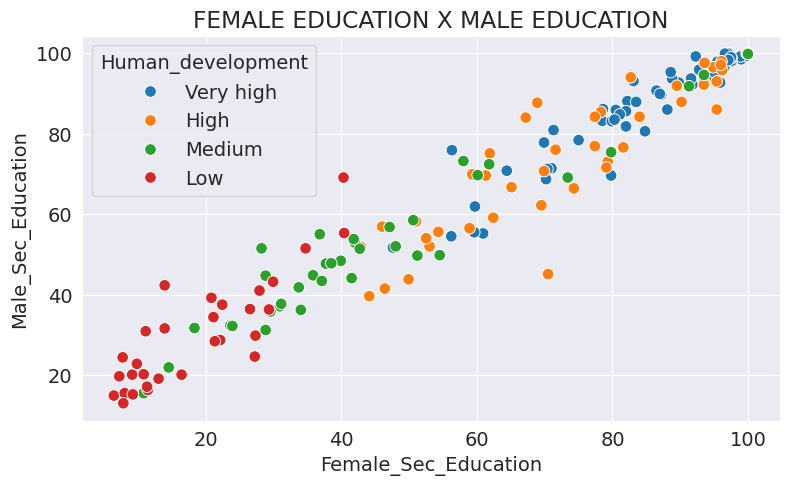

In [27]:
sns.scatterplot(data=inequality_df, x= 'Female_Sec_Education', y='Male_Sec_Education',
                hue= 'Human_development', s=70).set(title='FEMALE EDUCATION X MALE EDUCATION');

from the scatterplot above we can easily say that:

There is a cluster of reds at the bottom, showing an ultimate low in both male and female education as well as a very low human development.
There is a rising increase in both male and female education as human development increases
Human development is not gender specific as both male and female education increased in a straight line as human development increases(except for some outliers).
We can confidently say that, there is generally a positive correlation between male and female secondary education levels. Additionally, we can see that countries with higher levels of human development tend to have higher levels of both male and female education.

Q2. **What is the relationship between labour force and gender Inequality Index?**

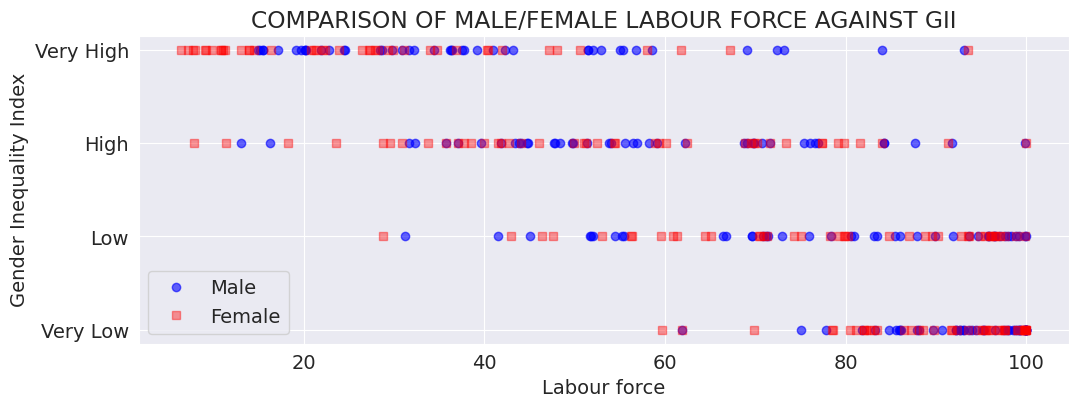

In [29]:
inequality_df["Gender_inequality_Bins"] = pd.cut(
    x=inequality_df["Gender_Inequality_Index"],
    bins= [0.012000, 0.177500, 0.363000, 0.505750, 0.820000],
    labels =["Very Low", "Low","High","Very High"]
)

plt.figure(figsize=(12,4))

plt.plot(inequality_df.Male_Sec_Education, inequality_df.Gender_inequality_Bins, 'ob', alpha=0.6)
plt.plot(inequality_df.Female_Sec_Education, inequality_df.Gender_inequality_Bins, 'sr', alpha=0.4);
plt.xlabel('Labour force')
plt.ylabel('Gender Inequality Index')
plt.legend(['Male', 'Female'])
plt.title('COMPARISON OF MALE/FEMALE LABOUR FORCE AGAINST GII');

We can see that workers are distributed differently along each category lines.

* Very High: Is highly populated at the bottom of the chart with females scratching the least position
* High: Is highly populated at the middle, with only a few countries reaching the top mark.
* Low: Has no population at the bottom, sparse at the middle and not too dense at the top.
* Very Low: They are densely populated at the very top with only a few left behind the pack.

From the chart, we can observe that there is a general trend of increasing labour force participation as the GII decreases. Additionally, we can see that the male labour force participation rate is generally higher than the female rate across all levels of gender inequality, indicating that there is still significant gender-based discrimination in the labour market.

Q3. **What is the relationship between human development index, Gender Inequality index, and the distribution of parliamentary seats?**

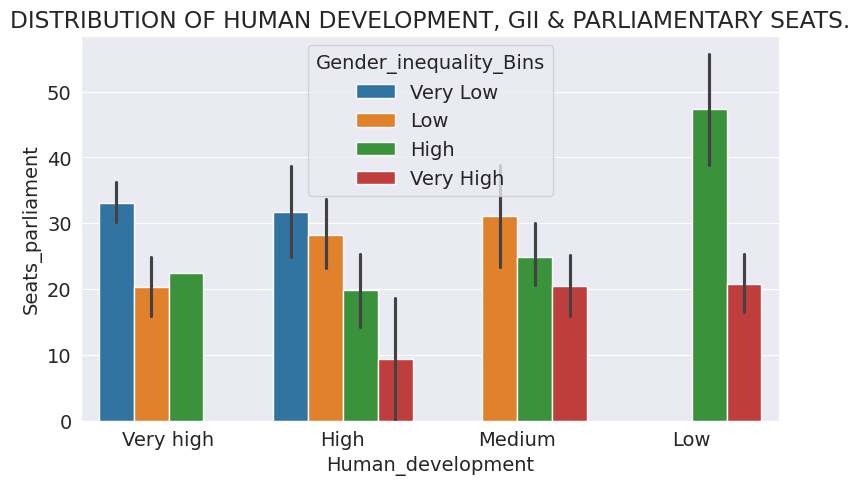

In [30]:
sns.barplot(data = inequality_df, x = 'Human_development',
            y = 'Seats_parliament', hue='Gender_inequality_Bins'
           ).set(title='DISTRIBUTION OF HUMAN DEVELOPMENT, GII & PARLIAMENTARY SEATS.');

From the chart, we can observe that there is no clear relationship between human development, GII, and parliamentary seats. Countries with lower levels of human development tend to have more parliamentary seats, while countries with low levels of gender inequality tend to have average seats. Additionally, the chart shows that the gender inequality bins with the lowest number of parliamentary seats tend to be those with high levels of human development.

#**Now let's move to the next dataset from Glassdoor**

---



Q4. **What is the difference in gender basepay by job title and education?**

In [31]:
# Add the basepay and bonus clumns to obtain the total pay
gender_paygap_df['TotalPay'] = gender_paygap_df['BasePay']+ gender_paygap_df['Bonus']
gender_paygap_df.head()

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus,TotalPay
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938,52301
1,Software Engineer,Male,21,5,College,Management,5,108476,11128,119604
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268,99476
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154,118234
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319,108783


<ipython-input-32-fd647a37f421>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


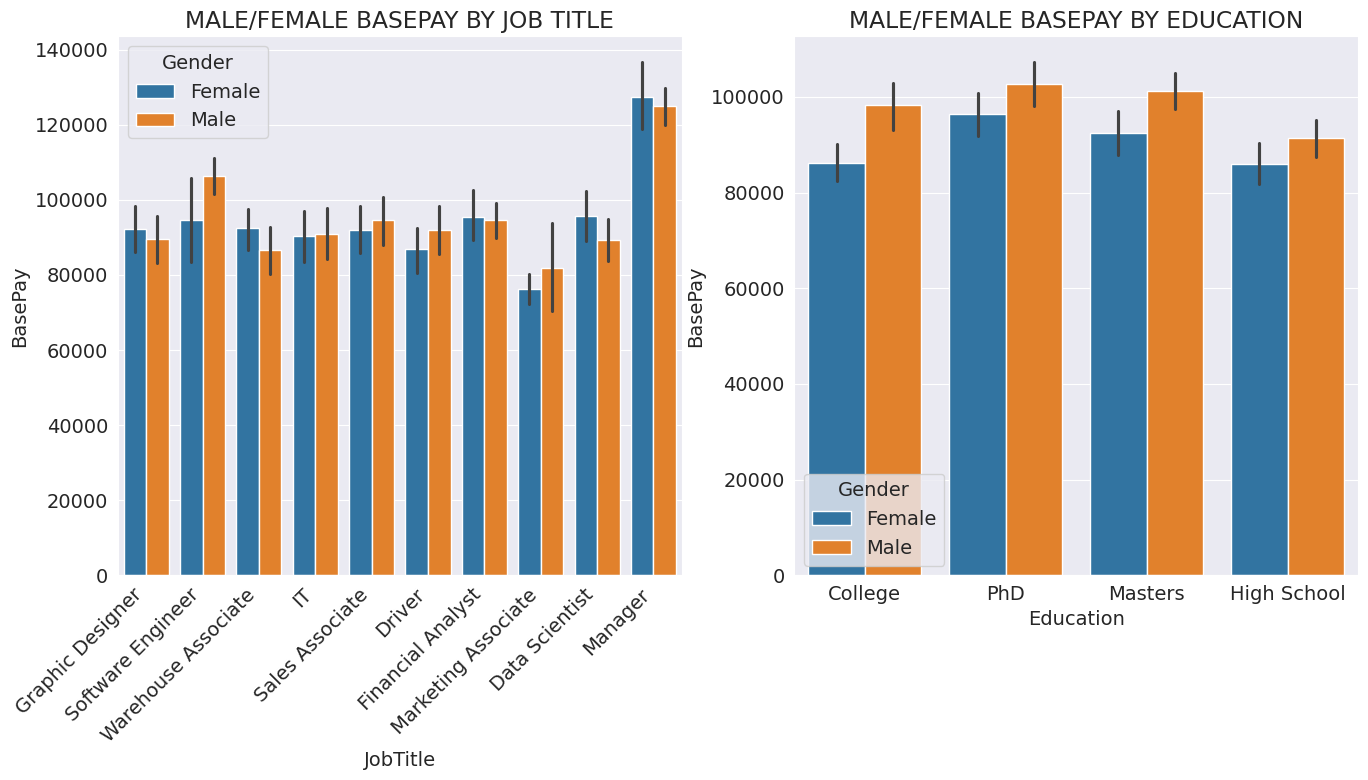

In [32]:
plt.figure(figsize=[16,7])

#plot on the left
plt.subplot(1,2,1)
ax = sns.barplot(data=gender_paygap_df, x='JobTitle', y='BasePay', hue='Gender')
ax.set(title='MALE/FEMALE BASEPAY BY JOB TITLE')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

#plot on the left
plt.subplot(1,2,2)
ax = sns.barplot(data=gender_paygap_df, x='Education', y='BasePay', hue='Gender')
ax.set(title='MALE/FEMALE BASEPAY BY EDUCATION');

From the first plot, we can observe that there is a significant gender pay gap for some job titles, particularly for those with higher base pay such as software engineer, Sales associates and Marketing associates. In these cases, male employees are paid more than female employees.

From the second plot, we can observe that there is also a gender pay gap based on education level. In most cases, male employees with higher education levels tend to have higher base pay than female employees with the same education level.

Q5. **How do the performance of male and female employees compare?**

In [33]:
df_female = gender_paygap_df[gender_paygap_df.Gender =='Female']
df_male = gender_paygap_df[gender_paygap_df.Gender =='Male']
df_male.head()

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus,TotalPay
1,Software Engineer,Male,21,5,College,Management,5,108476,11128,119604
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154,118234
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319,108783
7,Software Engineer,Male,18,4,PhD,Engineering,5,97523,10240,107763
10,Graphic Designer,Male,24,5,PhD,Engineering,5,102261,10212,112473


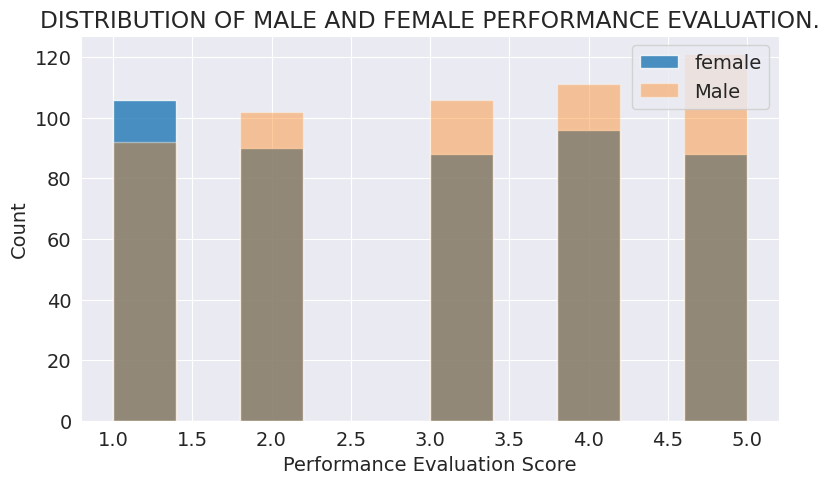

In [34]:
plt.hist(df_female.PerfEval, alpha=0.8)
plt.hist(df_male.PerfEval, alpha= 0.4)
plt.title('DISTRIBUTION OF MALE AND FEMALE PERFORMANCE EVALUATION.')
plt.xlabel('Performance Evaluation Score')
plt.ylabel('Count')
plt.legend(['female','Male']);

From the chart, we can observe that the distribution of performance evaluation scores is similar for male and female employees. However, there are slightly more male employees on the higher end of the performance evaluation scale (scores of 2.0 to 5.0) compared to female employees. On the other hand, there are slightly more female employees on the lower end of the scale (scores of 1.0 to 1.5) compared to male employees.

#**Inferences and Conclusion**

---



Two datasets were used for this work, The Gender Inequality Index and The Glassdoor Gender Paygap, all downloaded from kaggle. The Gender Inequality Index contains data across 170 countries while The Glassdoor Gender Paygap contains 1000 employees' data from the Glassdoor website.

**Data Exploration(EDA)**

From the eploratory data analysis it was discovered that;

* More than half of the countries in the dataset had a high human development index
* The lower the gender inequality index, the more equal a country will be. The least GII is 0.013000 and the highest is 0.820000.
* The 10 most unequal countries are Yemen,Papau New Guinea, Nigeria, Afghanistan, Central African Republic,Chad, Liberia, Haiti, Sierra Leone and Mauritania.
* The 10 most equal countries are Denmark, Norway, Switzerland, Sweden, Netherlands, Finland, Singapore, Iceland, Luxembourg and Belgium.
* Female education is a very important factor in the reduction of adolescent birth rate and maternal mortality. It was observed that countries with high level of female education have a low adolescent birthrate and maternal mortality rate.
* Female education is also important when looking to improve female labour force. The dat revealed a general trend of increasing female labor force participation as the level of female secondary education increases. Also Countries with more parliamentary seats held by women tend to have higher levels of female labor force participation.

Overall, these project demonstrates the importance of addressing gender inequality from multiple angles, including education, healthcare, labor force participation, employment, and pay equity. By promoting gender equality, we can create a more just and equitable society that benefits everyone.